In [106]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn import tree
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [107]:

# Suponiendo que tienes un DataFrame llamado 'df' y una columna 'price' para los precios
# Cargamos el conjunto de datos (ajusta la ruta según sea necesario)
df = pd.read_csv('../data/final_data/train/train_part1.csv')

# Definimos las clases de precio usando el método qcut de pandas
# Esto dividirá los precios en 3 grupos de igual tamaño (terciles)
df['price_class'] = pd.qcut(df['price'], q=3, labels=['baja', 'media', 'alta'])

# Revisamos las primeras filas para verificar las nuevas etiquetas de clase de precio
print(df[['price', 'price_class']].head())


   price price_class
0  22490       media
1  19990       media
2  17500       media
3  22900       media
4   4000        baja


C:\Users\gipas\AppData\Local\Temp\ipykernel_14632\2464640595.py:3: DtypeWarning: Columns (123,144) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../data/final_data/train/train_part1.csv')


In [108]:
from sklearn.preprocessing import LabelEncoder

# Lista de columnas categóricas a codificar
ordinal_columns = ['brand', 'model', 'color', 'fuelType', 'province', 'environmentalLabel']

# Creamos un diccionario para almacenar cada LabelEncoder por separado
label_encoders = {}

# Aplicamos Label Encoding a cada columna categórica de forma independiente
for col in ordinal_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # Guardamos el encoder por si necesitamos invertir la transformación

# Visualizamos el resultado de la codificación en la columna de ejemplo 'color'
print(df['model'])


0        571
1        705
2        310
3        229
4        266
        ... 
16508     58
16509    326
16510    200
16511    200
16512    683
Name: model, Length: 16513, dtype: int64


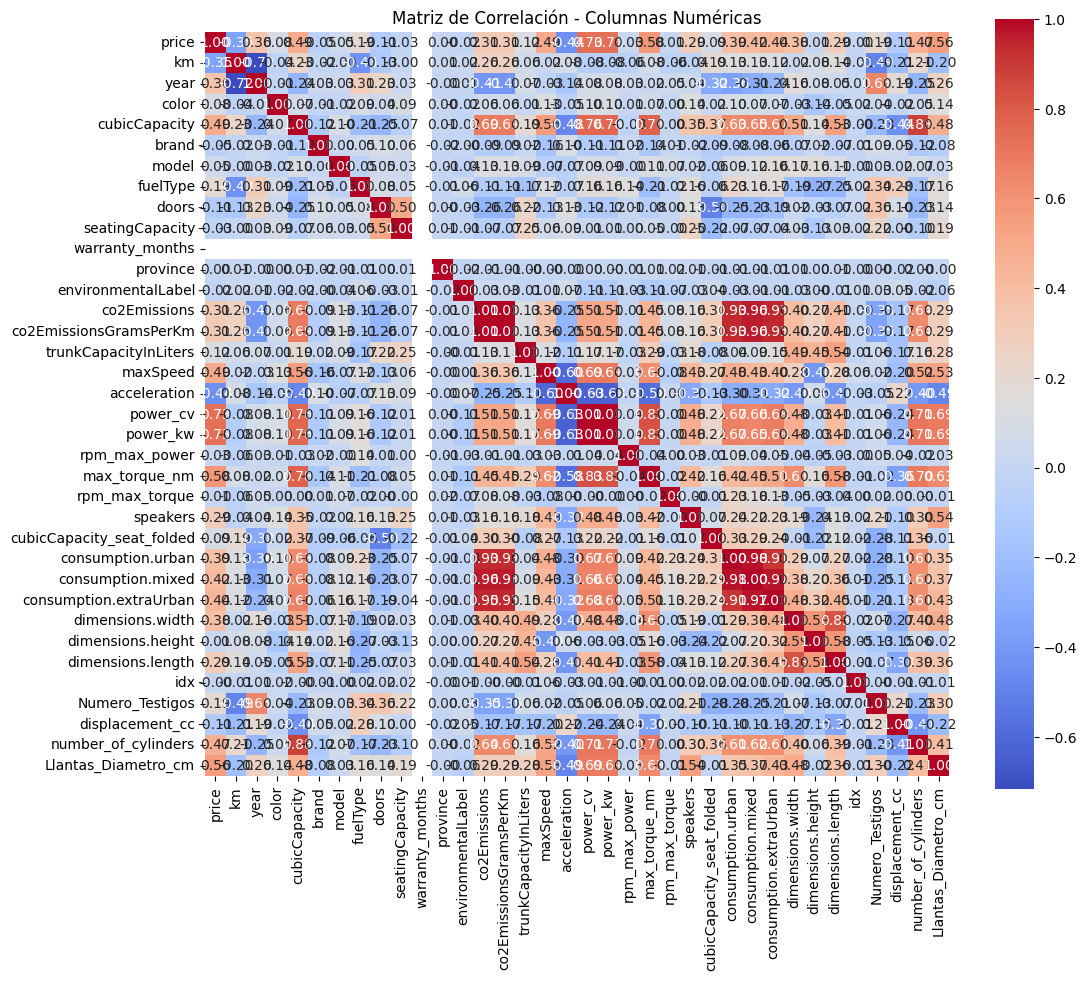

price                        1.000000
power_kw                     0.726511
power_cv                     0.726411
max_torque_nm                0.584208
Llantas_Diametro_cm          0.559532
maxSpeed                     0.490638
cubicCapacity                0.489901
number_of_cylinders          0.469679
consumption.extraUrban       0.439095
consumption.mixed            0.415045
consumption.urban            0.389353
dimensions.width             0.384935
year                         0.357322
co2EmissionsGramsPerKm       0.309877
co2Emissions                 0.309837
speakers                     0.293856
dimensions.length            0.289893
Numero_Testigos              0.190417
fuelType                     0.188152
trunkCapacityInLiters        0.115173
cubicCapacity_seat_folded    0.094998
color                        0.084364
model                        0.053204
rpm_max_power                0.026175
dimensions.height            0.008097
rpm_max_torque               0.005629
province    

In [109]:
# Filtrar solo las columnas numéricas
numeric_columns = df.select_dtypes(include=['int64', 'float64'])

# Calcular la matriz de correlación
correlation_matrix = numeric_columns.corr()

# Visualizar la matriz de correlación
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Matriz de Correlación - Columnas Numéricas')
plt.show()

# Mostrar la correlación específica con la categoría de precio
print(correlation_matrix['price'].sort_values(ascending=False))

In [110]:
print(df['price'].isna().sum())  # Ver cuántos NaN hay en 'price'
print(df['price'].value_counts())  # Ver los valores únicos y sus frecuencias


0
price
15990    141
19990    140
18990    137
16990    133
17990    133
        ... 
9560       1
89890      1
18440      1
24831      1
21195      1
Name: count, Length: 2739, dtype: int64


In [111]:
# Eliminar filas donde 'price' sea NaN
df = df.dropna(subset=['price'])

# Opcional: Eliminar duplicados en 'price'
df = df.drop_duplicates(subset=['price'])


In [113]:
# Verificar si la columna 'price' está vacía después de eliminar nulos
if df['price'].isna().all():
    print("La columna 'price' está vacía después de eliminar valores nulos.")
else:
    print("La columna 'price' tiene valores válidos.")


La columna 'price' tiene valores válidos.


Accuracy: 0.805352798053528

Classification Report:
               precision    recall  f1-score   support

        alta       0.90      0.89      0.89       416
        baja       0.80      0.84      0.82       206
       media       0.62      0.60      0.61       200

    accuracy                           0.81       822
   macro avg       0.77      0.78      0.77       822
weighted avg       0.80      0.81      0.80       822


Confusion Matrix:
 [[369   3  44]
 [  2 173  31]
 [ 41  39 120]]


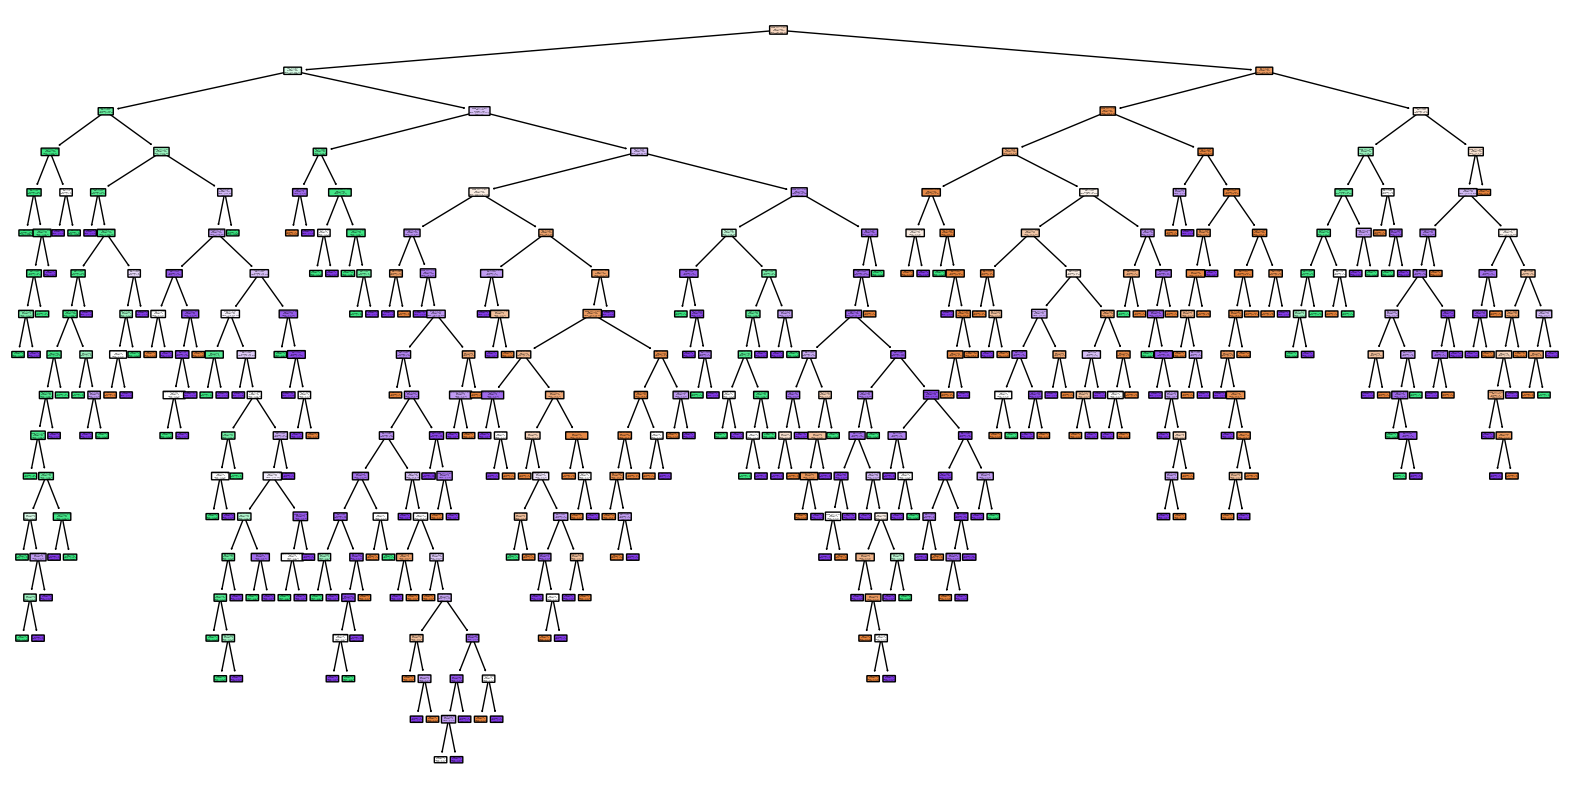

In [114]:


numeric_columns2 = ['price', 'km', 'year', 'cubicCapacity','power_cv', 'co2Emissions', 
                   'color', 'maxSpeed',]

# Eliminar las columnas no necesarias para el modelo
columns_to_keep = numeric_columns2 + ordinal_columns + ['price_class']
df = df[columns_to_keep]


# 5. Separar características (X) y variable objetivo (y)
X = df.drop(columns=['price', 'price_class'])
y = df['price_class']

# 6. Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 7. (Opcional) Normalizar los datos
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 8. Entrenar el modelo CART
cart_model = DecisionTreeClassifier(random_state=42)
cart_model.fit(X_train, y_train)

# 9. Evaluar el modelo
y_pred = cart_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


# 11. Visualizar el Árbol de Decisión con plot_tree
plt.figure(figsize=(20, 10))
plot_tree(cart_model, feature_names=X.columns, class_names=['baja', 'media', 'alta'], filled=True, rounded=True)
plt.show()